# Multilayer Perceptrons
You should build an end-to-end machine learning pipeline using a multilayer perceptron model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Build an end-to-end machine learning pipeline, including a [multilayer perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) model.
- Optimize your pipeline by validating your design decisions.
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

Fitting 3 folds for each of 72 candidates, totalling 216 fits
✅ Best parameters found:
{'mlp__activation': 'tanh', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate_init': 0.01, 'mlp__max_iter': 100}

🎯 Test Accuracy: 0.9777777777777777

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.94      0.94      0.94        36
           2       0.92      1.00      0.96        35
           3       1.00      0.97      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.94      0.89      0.91        35
           9       1.00      0.97      0.99        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted

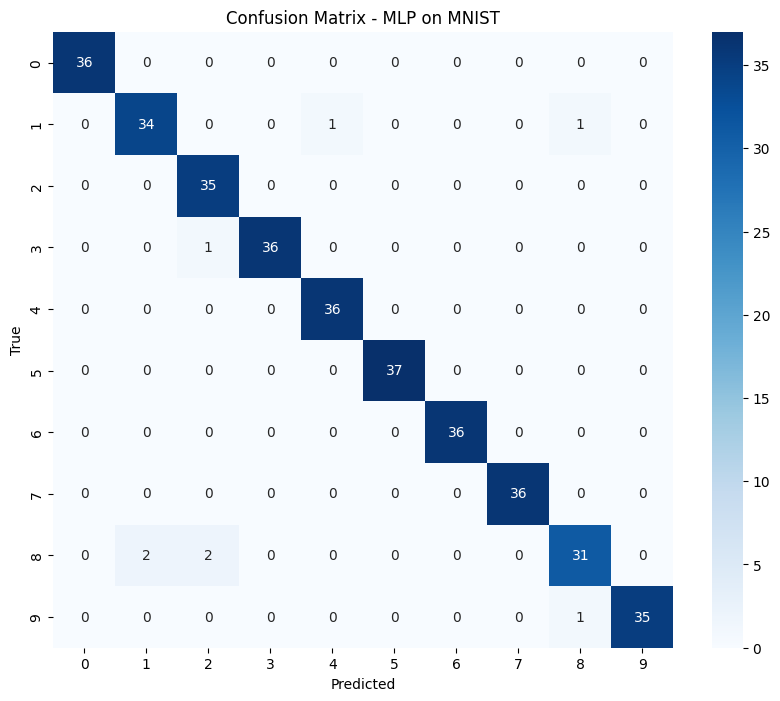


🔍 Model Summary:
Iterations run: 55
Final loss: 0.0079
Number of layers (including input/output): 3
Hidden layer sizes: (50,)


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits


# 1. Load dataset
df = pd.DataFrame(load_digits().data)
df['label'] = load_digits().target

# Assuming first column = label
X = df.drop('label', axis=1)
y = df['label']

# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Build pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42))
])

# 4. Define hyperparameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate_init': [0.001, 0.01],
    'mlp__max_iter': [50, 100]
}

# 5. Optimize with Grid Search
grid_search = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("✅ Best parameters found:")
print(grid_search.best_params_)

# 6. Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n🎯 Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# 7. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - MLP on MNIST")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 8. Inspect key model attributes
mlp_model = best_model.named_steps['mlp']
print("\n🔍 Model Summary:")
print(f"Iterations run: {mlp_model.n_iter_}")
print(f"Final loss: {mlp_model.loss_:.4f}")
print(f"Number of layers (including input/output): {mlp_model.n_layers_}")
print(f"Hidden layer sizes: {mlp_model.hidden_layer_sizes}")
